# Preparation

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler, robust_scale, Normalizer
from sklearn.model_selection import train_test_split, GridSearchCV , TimeSeriesSplit
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier
pd.set_option('float_format', lambda x: '%.3f' % x)

C:\Users\lenovo\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [170]:
#载入宽表
df = pd.read_pickle('df_aggregated.pkl')

# Time decay algorithm


In [12]:
# 此处连接构建全新变量及宽表后的最后保存文件
df_large = pd.read_csv('df_final_attributes.pkl')

In [13]:
# df_large.drop(columns = ['Unnamed: 0'],inplace = True)

In [ ]:
#从宽表中选取正负样本单独提取。正样本理应具有dclose与dbegin，去除其中的null值

In [14]:
df_large_pos = df_large.loc[df_large['category'] == 1].dropna(subset=['dclose', 'dbegin'])

In [42]:
df_large_pos

,vcusmobile,ucusid,stayTime,bislookvie,bistryvie,category,count,Guanzhu0,Guanzhu1,Guanzhu2,...,vabandonrsn_5.0,vabandonrsn_6.0,vabandonrsn_7.0,vabandonrsn_8.0,vintentionlvl_2.0,vintentionlvl_3.0,vintentionlvl_4.0,dclose,dbegin,gap
1,00006ce1e6d98d745e5074f6e38eb0f4,5ac1f832-efbc-4f32-8c91-85becbafc0bd,1800.000,0.000,0.000,1.000,1,0,0,0,...,0,0,0,0,0,1,0,2020-05-18 10:27:12,2020-04-11 11:48:01,36.944
2,0000945858bcf28378eddac3006fa573,715d0edf-fdb0-42f0-a58b-bcfbe70c20db,1800.000,0.000,0.000,1.000,1,0,0,0,...,0,0,0,0,0,0,0,2020-06-10 13:54:26,2020-06-10 13:10:17,0.031
8,000155be1a38a381f3bd2027b49e401b,7f42a883-8dfc-42b8-857b-35d1043f35e4,3300.000,0.000,0.000,1.000,1,0,0,0,...,0,0,0,0,0,0,0,2019-12-06 18:21:57,2019-12-05 10:14:38,1.338
9,0001a71752db9c4d65ce633d27b5a367,bea73ecc-8f17-4148-8676-8960380d4a99,1800.000,0.000,0.000,1.000,1,0,0,0,...,0,0,0,0,1,0,0,2020-01-14 12:21:43,2019-11-22 17:19:00,52.794
10,0002335a7450b8fce911f97c2c06d17a,d79bcaac-2ee9-4d4f-8cb4-4775abba165d,17002.000,0.000,0.000,1.000,1,0,0,0,...,0,0,0,0,0,0,0,2020-03-01 10:03:59,2020-02-25 12:38:52,4.892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191506,fffbc6482bef3c01bcf96aa743d0d8fd,75b7c900-b68f-4705-9ef1-92deafbaf6f1,1800.000,0.000,0.000,1.000,1,0,0,0,...,0,0,0,0,0,0,0,2020-06-13 17:01:26,2020-06-13 15:56:57,0.045
191507,fffc0ab514f6c8a7ca3520ba700aea22,9a5a2aec-1c8c-493d-b5cf-94ecb7581e99,2247.000,0.000,0.000,1.000,2,0,0,0,...,0,0,0,0,0,1,0,2020-06-13 16:54:45,2020-06-12 09:14:14,1.320
191508,fffc26ad69a9257eac02ed92b59f3c2a,86040569-0ed5-4783-be9f-ef7b6222ddcb,1800.000,0.000,0.000,1.000,1,0,0,0,...,0,0,0,0,0,0,0,2020-01-23 13:07:19,2020-01-19 09:06:38,4.167
191512,fffdfb90b38f36d6390a806762d820f4,5183966e-6872-4a34-b1c9-4bc687432c20,16200.000,0.000,0.000,1.000,1,0,0,0,...,0,0,0,0,0,0,0,2020-05-24 18:43:23,2020-05-24 14:01:46,0.196


In [15]:
df_large_neg = df_large.loc[df_large['category'] == 0]

In [15]:
df_large_neg

,vcusmobile,ucusid,stayTime,bislookvie,bistryvie,category,count,Guanzhu0,Guanzhu1,Guanzhu2,...,vabandonrsn_5.0,vabandonrsn_6.0,vabandonrsn_7.0,vabandonrsn_8.0,vintentionlvl_2.0,vintentionlvl_3.0,vintentionlvl_4.0,dclose,dbegin,gap
0,00001b6d6c161c782e7279412554aca1,de98515e-70f7-4809-90f4-79b8b2b64bb7,393.000,0.000,0.000,0.000,1,0,0,0,...,0,0,0,0,0,0,0,NaN,2020-04-07 09:52:27,nan
3,0000c0cfb42f98ca09903743c3863af2,fb1490fe-9795-4890-8fa4-6d3a1258ce6e,1800.000,0.000,0.000,0.000,1,0,0,0,...,0,0,0,0,0,1,0,NaN,2020-04-11 11:30:11,nan
4,0000e4d62a27572d110046e45fe14583,2d10ba00-6d2c-4449-b342-b992d4fcdf95,8801.000,0.000,0.000,0.000,1,0,0,0,...,0,0,0,0,0,1,0,NaN,2019-12-13 14:45:19,nan
5,0000f45f6636b2c251e4e84a9e5265cf,2112e1bb-1dd9-4a01-882d-35802d4d2ebc,456.000,0.000,0.000,0.000,1,0,0,0,...,0,0,0,0,0,0,0,NaN,2020-05-09 10:59:26,nan
6,00011a8d3eb69590a56a27460e0b7e87,e4077e09-b17f-4425-b30b-de1cf2d1a902,1800.000,0.000,0.000,0.000,1,0,0,0,...,0,0,0,0,0,0,1,NaN,2020-01-09 18:28:43,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191514,fffe051180d6224230e01167885223f6,71a7d352-db68-4bec-9174-31f56941b117,3840.000,0.000,0.000,0.000,1,0,0,0,...,0,0,0,0,0,0,1,NaN,2020-01-11 10:20:16,nan
191515,fffeb108d8b22010b5b7dcc426636e81,e508bd09-220f-4e11-850c-e47de9ba8fdd,1800.000,1.000,1.000,0.000,1,0,0,0,...,0,0,0,0,0,1,0,NaN,2020-04-11 16:15:16,nan
191516,fffef9d5efd26dad9fbb59b8270b570d,5c53570a-8413-455e-9114-a2ea0678bc92,1800.000,0.000,0.000,0.000,1,0,0,0,...,0,0,0,0,0,1,0,NaN,2019-11-10 16:06:47,nan
191518,ffff7d03e9b1431c1df4b25ea9b57ab4,1ecc184b-a3f4-46eb-93f2-deea38ff27f3,720.000,0.000,0.000,0.000,1,0,0,0,...,0,0,0,0,0,0,1,NaN,2020-04-24 10:50:27,nan


In [17]:
from datetime import datetime

In [18]:
import time

# 对于负样本 此处使用的是“当前时间” 也就是程序运行的时间 来计算与客户到店时间的差值，可自行调整

In [19]:
df_large_neg[[ 'dclose']] =df_large_neg[[ 'dclose']].fillna(value = datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

C:\Users\darth\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [20]:
interval = 60*60*24

In [21]:
# 通过计算unix时间戳的差值并且整除 输出两个时间之中存在多少个时间段
# @param:   begin：开始时间
#           end:结束时间
#           interval:一个时间段的长度（秒）
# @return:  所经过的时间段数量 
def getTime(begin,end,interval):
    gap = time.mktime(datetime. strptime(end, '%Y-%m-%d %H:%M:%S').timetuple()) - time.mktime(datetime.strptime(begin, '%Y-%m-%d %H:%M:%S').timetuple())
    return gap//interval

In [22]:
df_large_neg['gap'] = df_large_neg.apply(lambda x: getTime(x['dbegin'], x['dclose'],interval), axis=1)

C:\Users\darth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_large_pos['gap'] = df_large_pos.apply(lambda x: getTime(x['dbegin'], x['dclose'],interval), axis=1)

In [27]:
df_gap = pd.concat([df_large_neg[['vcusmobile','gap']],df_large_pos[['vcusmobile','gap']]]) 

In [28]:
#得出入店-完成（未完成则为至今）的时间差（以天为单位）
df_gap 

,vcusmobile,gap
0,00001b6d6c161c782e7279412554aca1,115.000
3,0000c0cfb42f98ca09903743c3863af2,111.000
4,0000e4d62a27572d110046e45fe14583,231.000
5,0000f45f6636b2c251e4e84a9e5265cf,83.000
6,00011a8d3eb69590a56a27460e0b7e87,204.000
...,...,...
191506,fffbc6482bef3c01bcf96aa743d0d8fd,0.000
191507,fffc0ab514f6c8a7ca3520ba700aea22,1.000
191508,fffc26ad69a9257eac02ed92b59f3c2a,4.000
191512,fffdfb90b38f36d6390a806762d820f4,0.000


In [44]:
df_large_neg

,vcusmobile,ucusid,stayTime,bislookvie,bistryvie,category,count,Guanzhu0,Guanzhu1,Guanzhu2,...,vabandonrsn_5.0,vabandonrsn_6.0,vabandonrsn_7.0,vabandonrsn_8.0,vintentionlvl_2.0,vintentionlvl_3.0,vintentionlvl_4.0,dclose,dbegin,gap
0,00001b6d6c161c782e7279412554aca1,de98515e-70f7-4809-90f4-79b8b2b64bb7,393.000,0.000,0.000,0.000,1,0,0,0,...,0,0,0,0,0,0,0,2020-07-31 19:59:30,2020-04-07 09:52:27,115.000
3,0000c0cfb42f98ca09903743c3863af2,fb1490fe-9795-4890-8fa4-6d3a1258ce6e,1800.000,0.000,0.000,0.000,1,0,0,0,...,0,0,0,0,0,1,0,2020-07-31 19:59:30,2020-04-11 11:30:11,111.000
4,0000e4d62a27572d110046e45fe14583,2d10ba00-6d2c-4449-b342-b992d4fcdf95,8801.000,0.000,0.000,0.000,1,0,0,0,...,0,0,0,0,0,1,0,2020-07-31 19:59:30,2019-12-13 14:45:19,231.000
5,0000f45f6636b2c251e4e84a9e5265cf,2112e1bb-1dd9-4a01-882d-35802d4d2ebc,456.000,0.000,0.000,0.000,1,0,0,0,...,0,0,0,0,0,0,0,2020-07-31 19:59:30,2020-05-09 10:59:26,83.000
6,00011a8d3eb69590a56a27460e0b7e87,e4077e09-b17f-4425-b30b-de1cf2d1a902,1800.000,0.000,0.000,0.000,1,0,0,0,...,0,0,0,0,0,0,1,2020-07-31 19:59:30,2020-01-09 18:28:43,204.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191514,fffe051180d6224230e01167885223f6,71a7d352-db68-4bec-9174-31f56941b117,3840.000,0.000,0.000,0.000,1,0,0,0,...,0,0,0,0,0,0,1,2020-07-31 19:59:30,2020-01-11 10:20:16,202.000
191515,fffeb108d8b22010b5b7dcc426636e81,e508bd09-220f-4e11-850c-e47de9ba8fdd,1800.000,1.000,1.000,0.000,1,0,0,0,...,0,0,0,0,0,1,0,2020-07-31 19:59:30,2020-04-11 16:15:16,111.000
191516,fffef9d5efd26dad9fbb59b8270b570d,5c53570a-8413-455e-9114-a2ea0678bc92,1800.000,0.000,0.000,0.000,1,0,0,0,...,0,0,0,0,0,1,0,2020-07-31 19:59:30,2019-11-10 16:06:47,264.000
191518,ffff7d03e9b1431c1df4b25ea9b57ab4,1ecc184b-a3f4-46eb-93f2-deea38ff27f3,720.000,0.000,0.000,0.000,1,0,0,0,...,0,0,0,0,0,0,1,2020-07-31 19:59:30,2020-04-24 10:50:27,98.000


In [218]:
df_time_pos = df_large_pos[['vcusmobile','gap']]
df_time_neg = df_large_neg[['vcusmobile','gap']]

In [219]:
#去除小于0 或大于120（一个季度）的数值
df_time_pos = df_time_pos.loc[df_time_pos['gap']>=0]
df_time_pos = df_time_pos.loc[df_time_pos['gap']<=120]
df_time_neg = df_time_neg.loc[df_time_neg['gap']>=0]
df_time_neg = df_time_neg.loc[df_time_neg['gap']<=120]

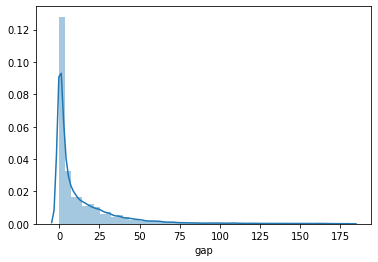

In [188]:
import seaborn as sns
sns.distplot(df_time_pos['gap'])

In [198]:
#以天为单位 统计各个时间差的用户数量
df_temp = df_time_pos.groupby('gap').count()

In [199]:
df_temp = df_temp.reset_index(level='gap')

In [200]:
df_temp

,gap,vcusmobile
0,0.000,19729
1,1.000,6982
2,2.000,4449
3,3.000,3430
4,4.000,2796
...,...,...
116,116.000,18
117,117.000,24
118,118.000,16
119,119.000,26


In [201]:
#归一化处理
import numpy as np
def normalize(x):
    return x/ np.sqrt(np.sum(x**2))

In [202]:
normalize(df_temp['vcusmobile'])

0     0.872
1     0.308
2     0.197
3     0.152
4     0.124
       ... 
116   0.001
117   0.001
118   0.001
119   0.001
120   0.001
Name: vcusmobile, Length: 121, dtype: float64

In [53]:
from scipy.optimize import curve_fit

In [203]:
#拟合函数模型
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit a time-decay model to the time gap distribution

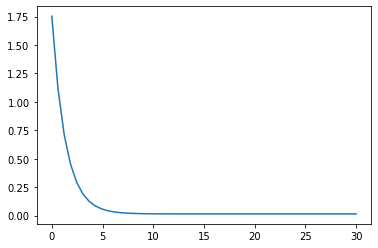

In [236]:
# 因为函数模型本身限制 输入x时需+1
popt, pcov = curve_fit(func, (df_temp['gap']+1), normalize(df_temp['vcusmobile']))
xdata = np.linspace(0, 30, 50)
plt.plot(xdata, func(xdata, *popt))

## 由此可见 时间差超过4天 即基本无可能挽回

In [66]:
df_time_neg.groupby('gap').count()

,vcusmobile
gap,
30.000,8
31.000,153
32.000,69
33.000,92
34.000,87
...,...
6729.000,1
6730.000,1
6732.000,1


In [220]:
df_time_neg

,vcusmobile,gap
0,00001b6d6c161c782e7279412554aca1,115.000
3,0000c0cfb42f98ca09903743c3863af2,111.000
5,0000f45f6636b2c251e4e84a9e5265cf,83.000
21,00068c07876232eed0670693c57bbaed,88.000
24,000789a1183d1997010b227033387360,90.000
...,...,...
191503,fffb30eee5602aad3f4ee24681ef9012,96.000
191504,fffb4d0c3f524bcde7a8eaa86cb76d76,97.000
191513,fffdfc04b0899eaf83653b8384ef5029,87.000
191515,fffeb108d8b22010b5b7dcc426636e81,111.000


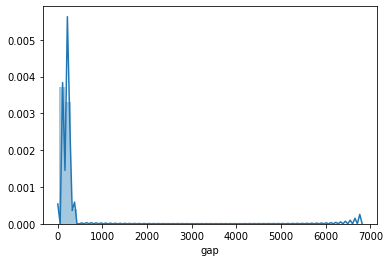

In [65]:
sns.distplot(df_time_neg['gap'])

## 由于负样本最近的至今也有30天，我们选择选取2020/7/1作为结束日期，如此使得最接近的负样本的时间差为0


In [206]:
popt

array([0.82334462, 0.74788039, 0.01418003])

In [230]:
df_time_neg['multiplier'] = df_time_neg.apply(lambda x: func((x['gap']-29),*popt), axis=1)

In [231]:
adj = df_time_neg['multiplier'].max()

In [232]:
df_time_neg['multiplier'] = df_time_neg.apply(lambda x: x['multiplier']*(1/adj), axis=1)

In [233]:
df_time_neg

,vcusmobile,gap,multiplier
0,00001b6d6c161c782e7279412554aca1,115.000,0.017
3,0000c0cfb42f98ca09903743c3863af2,111.000,0.017
5,0000f45f6636b2c251e4e84a9e5265cf,83.000,0.017
21,00068c07876232eed0670693c57bbaed,88.000,0.017
24,000789a1183d1997010b227033387360,90.000,0.017
...,...,...,...
191503,fffb30eee5602aad3f4ee24681ef9012,96.000,0.017
191504,fffb4d0c3f524bcde7a8eaa86cb76d76,97.000,0.017
191513,fffdfc04b0899eaf83653b8384ef5029,87.000,0.017
191515,fffeb108d8b22010b5b7dcc426636e81,111.000,0.017


In [234]:
df_time_neg['multiplier'].max()

1.0

In [237]:
df_neg_full = df_neg.merge(df_time_neg, how = 'inner', left_on='vcusmobile', right_on='vcusmobile')

In [238]:
df_neg_full

,vcusmobile,ucusid,stayTime,bislookvie,bistryvie,vintentionlvl,category,count,test_count,ttl_test,...,Guanzhu4_1,Guanzhu5_1,Guanzhu6_1,Guanzhu7_1,Guanzhu8_1,is_test_1.0,is_test_drive_2.0,probability,gap,multiplier
0,ae5ddcf717f9dc45e2e247f836307e94,73acde3c-fb8d-4fe9-88d9-afb8ef8ad8dd,1800.000,0.000,0.000,1.000,0.000,1,0.000,0.000,...,1,1,1,1,1,0,1,0.987,57.000,0.017
1,062a74f7a074d2923d05551127e8149c,3df48edc-2f3a-46f1-aafb-268bc9d1db6f,28800.000,0.000,0.000,1.000,0.000,16,0.000,0.000,...,0,0,0,0,0,0,0,0.984,80.000,0.017
2,062a74f7a074d2923d05551127e8149c,3df48edc-2f3a-46f1-aafb-268bc9d1db6f,28800.000,0.000,0.000,1.000,0.000,16,0.000,0.000,...,0,0,0,0,0,0,0,0.984,80.000,0.017
3,062a74f7a074d2923d05551127e8149c,3df48edc-2f3a-46f1-aafb-268bc9d1db6f,28800.000,0.000,0.000,1.000,0.000,16,0.000,0.000,...,0,0,0,0,0,0,0,0.984,80.000,0.017
4,062a74f7a074d2923d05551127e8149c,3df48edc-2f3a-46f1-aafb-268bc9d1db6f,28800.000,0.000,0.000,1.000,0.000,16,0.000,0.000,...,0,0,0,0,0,0,0,0.984,80.000,0.017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35873,e05ee5a060c546e94db604ab6d11394c,898e6888-abae-43eb-a586-03fd4117d6ab,1800.000,0.000,0.000,3.000,0.000,1,0.000,0.000,...,0,0,0,0,0,0,1,0.000,92.000,0.017
35874,d78cbef6e61279bd3ccfedd30a86e85d,00e93807-1165-4291-b6f6-1dde64ad98dd,960.000,0.000,0.000,4.000,0.000,1,0.000,0.000,...,0,0,0,0,0,0,1,0.000,71.000,0.017
35875,9fd8fb3bfc4d72345e36c188796d2153,80d7bd7a-ab3b-4de8-844d-1552c9f3a816,900.000,0.000,0.000,3.000,0.000,1,0.000,0.000,...,0,0,0,0,0,0,1,0.000,87.000,0.017
35876,3bd113635581ed611397530cd5c4af27,757b1e3e-c4aa-4aaa-a821-84613a8ebc2d,1800.000,0.000,0.000,1.000,0.000,1,0.000,0.000,...,0,0,0,0,0,0,1,0.000,64.000,0.017


In [239]:
df_neg_full['time-adjusted_prob'] = df_neg_full['probability'] * df_neg_full['multiplier']

In [240]:
df_neg_full = df_neg_full.sort_values(by=['time-adjusted_prob'],ascending = False)

In [242]:
df_neg_full.to_csv('Negative Time Adjusted Probability Descending.csv',index = False)

In [5]:
# 读取宽表并连接下发字段
df_neg_full = pd.read_csv('Negative Time Adjusted Probability Descending.csv').drop(columns = ['Unnamed: 0'])

In [7]:
df_large.drop(columns = ['gap'],inplace = True)

In [9]:
df_large = df_large.merge(df_neg_full[['vcusmobile','gap','multiplier','time-adjusted_prob']], how = 'inner', left_on='vcusmobile', right_on='vcusmobile')

In [10]:
含所有负样本的time - decay
df_large 

,vcusmobile,ucusid,stayTime,bislookvie,bistryvie,category,count,Guanzhu0,Guanzhu1,Guanzhu2,...,vabandonrsn_7.0,vabandonrsn_8.0,vintentionlvl_2.0,vintentionlvl_3.0,vintentionlvl_4.0,dclose,dbegin,gap,multiplier,time-adjusted_prob
0,00001b6d6c161c782e7279412554aca1,de98515e-70f7-4809-90f4-79b8b2b64bb7,393.000,0.000,0.000,0.000,1,0,0,0,...,0,0,0,0,0,NaN,2020-04-07 09:52:27,115.000,0.017,0.000
1,0000c0cfb42f98ca09903743c3863af2,fb1490fe-9795-4890-8fa4-6d3a1258ce6e,1800.000,0.000,0.000,0.000,1,0,0,0,...,0,0,0,1,0,NaN,2020-04-11 11:30:11,111.000,0.017,0.000
2,0000f45f6636b2c251e4e84a9e5265cf,2112e1bb-1dd9-4a01-882d-35802d4d2ebc,456.000,0.000,0.000,0.000,1,0,0,0,...,0,0,0,0,0,NaN,2020-05-09 10:59:26,83.000,0.017,0.000
3,00068c07876232eed0670693c57bbaed,c5f0ee77-8b06-40c1-bcfa-eb6f4491b775,1800.000,0.000,0.000,0.000,1,0,0,0,...,0,0,0,0,0,NaN,2020-05-04 15:56:46,88.000,0.017,0.000
4,000789a1183d1997010b227033387360,0a29d699-5a6f-4a51-a865-8733f66257b8,1800.000,1.000,1.000,0.000,1,0,0,0,...,0,0,0,0,0,NaN,2020-05-02 17:13:45,90.000,0.017,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35943,fffb30eee5602aad3f4ee24681ef9012,b0fd4fe5-2fd6-4a2d-bb60-3857b85c9c73,1800.000,0.000,0.000,0.000,1,0,0,0,...,0,0,0,1,0,NaN,2020-04-26 12:30:33,96.000,0.017,0.000
35944,fffb4d0c3f524bcde7a8eaa86cb76d76,8429b4b8-b998-4178-bc65-7a4df8074244,780.000,0.000,0.000,0.000,1,0,0,0,...,0,0,0,0,0,NaN,2020-04-25 11:35:00,97.000,0.017,0.000
35945,fffdfc04b0899eaf83653b8384ef5029,31a45513-9a2a-4e63-b6b7-25243a2166a2,1800.000,0.000,0.000,0.000,1,0,0,0,...,0,0,0,0,1,NaN,2020-05-05 15:30:44,87.000,0.017,0.000
35946,fffeb108d8b22010b5b7dcc426636e81,e508bd09-220f-4e11-850c-e47de9ba8fdd,1800.000,1.000,1.000,0.000,1,0,0,0,...,0,0,0,1,0,NaN,2020-04-11 16:15:16,111.000,0.017,0.000


df1 = pd.read_csv('Negative Time Adjusted Probability Descending.csv').drop(columns = ['Unnamed: 0'])
df2 = pd.read_csv('neg_table_3_wprob_wattr(1).csv').drop(columns = ['Unnamed: 0'])    